In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('cars.csv')
df.head()

,year_bought,km_driven,transmission,owner,selling_price
0,2007,70000,Manual,First Owner,60000
1,2007,50000,Manual,First Owner,135000
2,2012,100000,Manual,First Owner,600000
3,2017,46000,Manual,First Owner,250000
4,2014,141000,Manual,Second Owner,450000


In [3]:
# convert transmission and owner fetures into number by using labelEncoder

print(df['transmission'].unique())
print(df['owner'].unique())


['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [5]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

le = LabelEncoder()
oe = OrdinalEncoder()

df['transmission'] = le.fit_transform(df['transmission'])

oe = OrdinalEncoder(categories=[['First Owner','Second Owner', 'Fourth & Above Owner','Third Owner','Test Drive Car']])

# notice double brackets
df[['owner']] = oe.fit_transform(df[['owner']])


df.head()

,year_bought,km_driven,transmission,owner,selling_price
0,2007,70000,1,0.0,60000
1,2007,50000,1,0.0,135000
2,2012,100000,1,0.0,600000
3,2017,46000,1,0.0,250000
4,2014,141000,1,1.0,450000


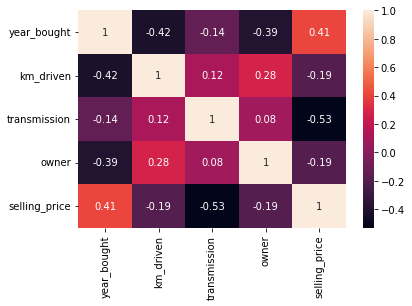

In [6]:
# feature importance
import seaborn as sns

correl_matrix = df.corr().round(2)
sns.heatmap(data=correl_matrix, annot=True)
plt.show()

In [ ]:
# Multiple reg

In [7]:
X = df[['year_bought', 'km_driven', 'transmission', 'owner']]
y = df['selling_price']
X.insert(0, 'x0', 1)
X.head()


,x0,year_bought,km_driven,transmission,owner
0,1,2007,70000,1,0.0
1,1,2007,50000,1,0.0
2,1,2012,100000,1,0.0
3,1,2017,46000,1,0.0
4,1,2014,141000,1,1.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train = X_train.values
y_train = y_train.values.reshape(len(y_train), 1)


In [12]:
import numpy as np

def calculate_theta(X, y):
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T),y)

theta = calculate_theta(X_train, y_train)

def predict(theta, X):
    return np.matmul(X, theta)

y_pred = predict(theta, X_test.values)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
results


,Actual,Predicted
1234,300000,596748.044975
3327,600000,547464.528972
1563,170000,253305.361876
2364,925000,643721.587763
2487,400000,450697.917267
...,...,...
2156,80000,157312.634793
2918,459999,520078.200237
3881,434999,594364.526289
1661,300000,364971.618720


In [15]:
# taking ip and predicting
X_ip = [1] + list(map(int,input("Enter year_bought, km_driven, transmission, owner : ").split()))[:4]
X_ip = np.array(X_ip).reshape(1, len(X_ip))

print('Predicted Selling Price of car is : ', predict(theta, X_ip)[0][0])



Predicted Selling Price of car is :  494372.6362811476


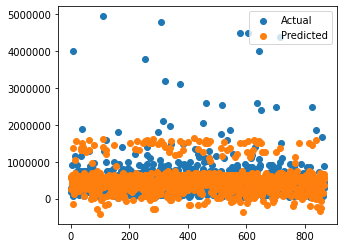

In [16]:
# Multiple Linear Regression - Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
ax = plt.axes()
ax.scatter(range(len(y_test)), y_test)
ax.scatter(range(len(y_test)), y_pred)
ax.ticklabel_format(style='plain')
plt.legend(['Actual', 'Predicted'])
plt.show()
